In [1]:
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('df_clean.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    26304 non-null  object 
 1   Price   26304 non-null  float64
dtypes: float64(1), object(1)
memory usage: 411.1+ KB


In [4]:
df.set_index('date', inplace=True)

In [5]:
df['moving_avg_7'] = df['Price'].rolling(window=7).mean()

In [6]:
df['moving_avg_7'].fillna(df['moving_avg_7'].mean(), inplace=True)

In [7]:
df.isnull().sum()

Price           0
moving_avg_7    0
dtype: int64

In [8]:
# Split the data into train and test sets
train = df[:'01.01.2022 01:00']
test = df['01.01.2022 01:00':]

In [9]:
X_train = train.drop('Price', axis=1)
y_train = train['Price']
X_test = test.drop('Price', axis=1)
y_test = test['Price']

In [10]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [11]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
y_pred = rf.predict(X_test)

In [18]:
squared_diff = (y_pred - y_test) ** 2
    
# Calculate the mean squared error
mse = np.mean(squared_diff)
rmse = np.sqrt(mse)

print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 70.11400037014317


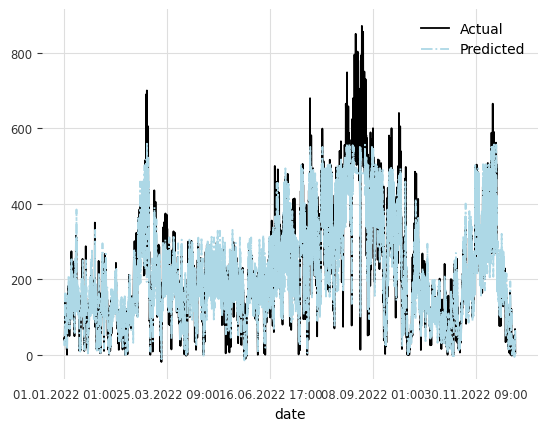

In [14]:
import matplotlib.pyplot as plt
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=['price'])

# Plot the actual and predicted prices
plot_params_actu = {'color': 'black'}
plot_params_pred = {'color': 'lightblue', 'linestyle': 'dashdot'}
ax = y_test.plot(**plot_params_actu)
ax = y_pred_df.plot(ax=ax, **plot_params_pred)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [15]:
y_pred

array([37.60165714, 35.54711333, 35.5193    , ..., 63.43026667,
       32.57865   , 47.32803333])

In [16]:
y_test

date
01.01.2022 01:00    41.33
01.01.2022 02:00    43.22
01.01.2022 03:00    45.46
01.01.2022 04:00    37.67
01.01.2022 05:00    39.70
                    ...  
31.12.2022 19:00    67.01
31.12.2022 20:00    40.50
31.12.2022 21:00    14.89
31.12.2022 22:00     9.94
31.12.2022 23:00     4.84
Name: Price, Length: 8759, dtype: float64